In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [2]:
data=pd.read_excel('rotacion_personal.xlsx')

In [66]:
print(data['FECHA DE NACIMIENTO'].isna().sum(), "fechas no válidas")

214 fechas no válidas


In [76]:
data['FECHA DE NACIMIENTO'] = pd.to_datetime(data['FECHA DE NACIMIENTO'], errors='coerce')
print(data['FECHA DE NACIMIENTO'].isna().sum(), "fechas no válidas")
data['EDAD'] = (pd.to_datetime('today') - data['FECHA DE NACIMIENTO']).dt.days // 365
data['EDAD'] = data['EDAD'].fillna(0).astype(int)
data_validas = data[data['EDAD'] > 18]

214 fechas no válidas


In [81]:
test=data_validas[['EDAD']]

In [82]:
histograma = alt.Chart(test).mark_bar().encode(
    alt.X('EDAD:Q', bin=alt.Bin(maxbins=20), title='Edad'),
    alt.Y('count():Q', title='Número de empleados'),
    color='EDAD:Q'
).properties(
    title="Distribución de Edades en la Rotación de Personal"
)
histograma.show()

alt.Chart(...)

# Las edades en donde mas se presenta la rotación del personal se encuentra entre los 20 y 25 años

In [50]:
conteo_puestos = data['PUESTO'].value_counts().reset_index()
conteo_puestos.columns = ['Puesto', 'Cantidad']

grafico = alt.Chart(conteo_puestos).mark_bar().encode(
    x=alt.X('Puesto:N', sort='-y'),
    y='Cantidad:Q',
    color='Puesto:N'
).properties(
    title="Distribución de Puestos"
)

grafico.show()

alt.Chart(...)

# Se puede observar que los puesto operarios es donde existe más rotación de persoanl 

In [4]:
data['Tipo de renuncia'].value_counts()

Tipo de renuncia
SEPARACION VOLUNTARIA        141
ABANDONO DE EMPLEO            79
RENUNCIA VOLUNTARIA           73
RECORTE DE PERSONAL           23
BAJA POR FALTAS               21
ABANDONO                      17
VOLUNTARIA                     9
RESCISION DE CONTRATO          8
BAJA                           8
TERMINACION                    3
RECISION DE CONTRATO           3
SEPARACION VOLUNTARIA          2
RENUNCIA X SALARIO             2
BAJA POR CIERRE DE BODEGA      1
PENSION DE INVALIDEZ           1
PENSION POR CESANTIA           1
CAMBIO A TIJUANA               1
DEFUNCIÓN                      1
BAJA POR DESEMPEÑO             1
TERMINATION                    1
TERMINO DE CONTRATO            1
TERMINO DE CONTRATO            1
Name: count, dtype: int64

In [5]:
tipos = {
    'Tipo de renuncia': [
        'SEPARACION VOLUNTARIA', 'ABANDONO DE EMPLEO', 'RENUNCIA VOLUNTARIA', 
        'RECORTE DE PERSONAL', 'BAJA POR FALTAS', 'ABANDONO', 'VOLUNTARIA',
        'RESCISION DE CONTRATO', 'BAJA', 'TERMINACION', 'RECISION DE CONTRATO', 
        'SEPARACION VOLUNTARIA', 'RENUNCIA X SALARIO', 'BAJA POR CIERRE DE BODEGA', 
        'PENSION DE INVALIDEZ', 'PENSION POR CESANTIA', 'CAMBIO A TIJUANA', 
        'DEFUNCIÓN', 'BAJA POR DESEMPEÑO', 'TERMINATION', 'TERMINO DE CONTRATO', 
        'TERMINO DE CONTRATO'
    ],
    'Frecuencia': [
        141, 79, 73, 23, 21, 17, 9, 8, 8, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1
    ]
}

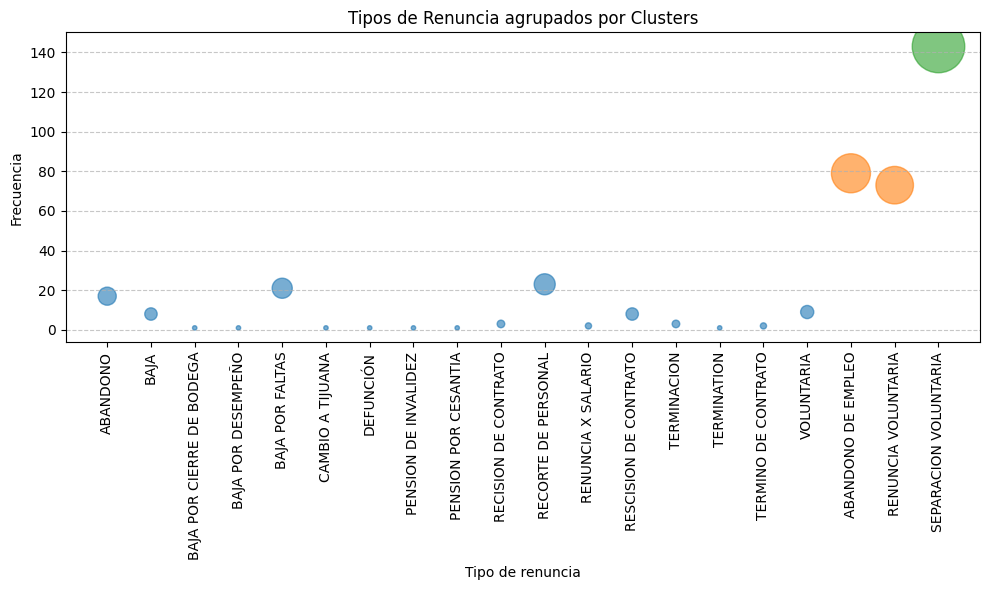

In [6]:
df = pd.DataFrame(tipos)
df = df.groupby('Tipo de renuncia', as_index=False).sum()
kmeans = KMeans(n_clusters=3, random_state=42) 
df['Cluster'] = kmeans.fit_predict(df[['Frecuencia']])
plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Tipo de renuncia'], cluster_data['Frecuencia'],
                s=cluster_data['Frecuencia'] * 10, alpha=0.6, label=f'Cluster {cluster}')
plt.xticks(rotation=90)
plt.xlabel('Tipo de renuncia')
plt.ylabel('Frecuencia')
plt.title('Tipos de Renuncia agrupados por Clusters')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

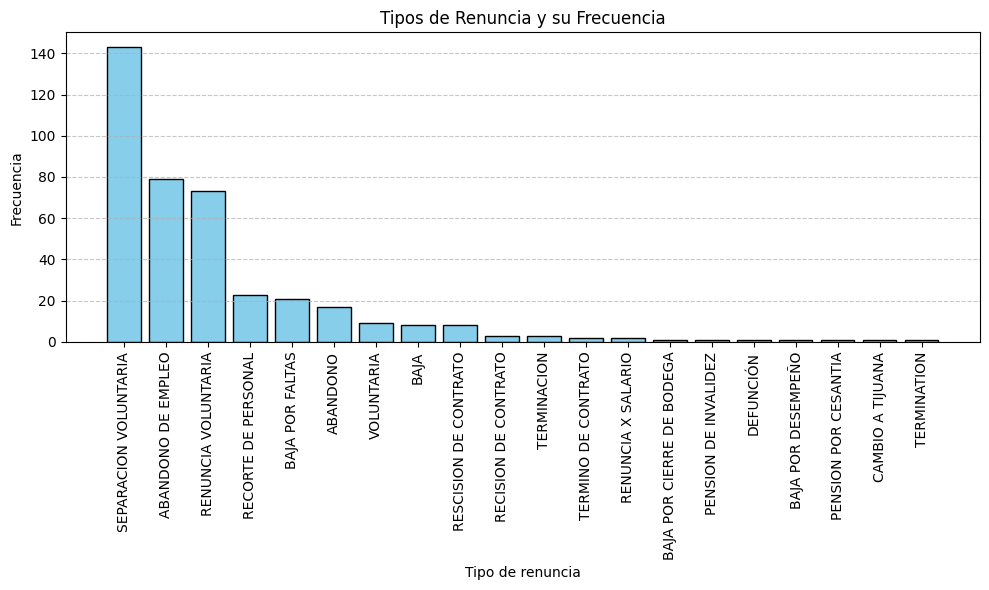

In [7]:
df = pd.DataFrame(tipos)
df = df.groupby('Tipo de renuncia', as_index=False).sum()
df = df.sort_values(by='Frecuencia', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df['Tipo de renuncia'], df['Frecuencia'], color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Tipo de renuncia')
plt.ylabel('Frecuencia')
plt.title('Tipos de Renuncia y su Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Podemos observar que los principales motivos de renuncia son por separación voluntaria, abandono de empleo, renuncia voluntaria y recorte de personal.

# Analizando las causas de estos 4 tipos de renuncia mediante un análisis de sentimiento

In [8]:
categorias_interes = [
    'SEPARACION VOLUNTARIA', 'ABANDONO DE EMPLEO', 'RENUNCIA VOLUNTARIA',
    'RECORTE DE PERSONAL'
]

df_filtrado = data[data['Tipo de renuncia'].isin(categorias_interes)]

In [9]:
df_filtrado.head(2)

,FECHA DE INGRESO,FECHA DE BAJA,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO DIARIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia,Motivo de renuncia
0,2023-11-21 00:00:00,22/11/2023,baja,1.0,1979-08-26,Si,OP PRODUCCION,PRODUCCION,C,TALA,250.0,7500.0,SECUNDARIA,FEMENINO,RENUNCIA VOLUNTARIA,SE LE COMPLICÓ EL HORARIO DEL TRANSPORTE PARA ...
5,2023-12-20 00:00:00,21/12/2023,baja,1.0,1968-08-17,NO,OP PRENSA,PRENSA,C,TLAJOMULCO,600.0,18000.0,PREPARATORIA,MASCULINO,ABANDONO DE EMPLEO,"SOLO ACUDIÓ A INDUCCION, YA NO S EPRESENTÓ Y N..."


In [10]:
from transformers import AutoTokenizer

# Cargar tokenizador preentrenado (modelo en español)
tokenizer = AutoTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-cased')

c:\Users\habar\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
def limpiar_texto(texto):
    """Función de limpieza, tokenización y reconstrucción de palabras"""
    if not isinstance(texto, str): 
        return ""
    texto = re.sub(r'[^a-zA-ZáéíóúñÁÉÍÓÚÑ ]', '', texto)  
    texto = texto.lower()  
    tokens = tokenizer.tokenize(texto)  
    
    palabras = []
    for token in tokens:
        if token.startswith("##"):
            palabras[-1] += token[2:]  
        else:
            palabras.append(token) 
    
    return ' '.join(palabras)  



In [12]:
df_filtrado['Texto Limpio'] = df_filtrado['Motivo de renuncia'].apply(limpiar_texto)

C:\Users\habar\AppData\Local\Temp\ipykernel_14776\1722774966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Texto Limpio'] = df_filtrado['Motivo de renuncia'].apply(limpiar_texto)


In [13]:
df_filtrado['Texto Limpio'] 

0      se le complicó el horario del transporte para ...
5      solo acudió a induccion ya no s epresentó y no...
8      ya no se presentó y no respondió mensjaes ni l...
9                                                       
10     estuvimos tratando de localizarlo pero no fue ...
                             ...                        
417                                                     
421    su mamá fallecio se le otorgó el permiso que m...
424                              faltas y bajo desempeño
425                                                     
430                                                     
Name: Texto Limpio, Length: 177, dtype: object

In [14]:
from textblob import TextBlob

In [15]:

def analizar_sentimiento(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity  # Polaridad: -1 (negativo), 0 (neutro), +1 (positivo)

def clasificar_sentimiento(polaridad):
    if polaridad > 0:
        return 'Positivo'
    elif polaridad < 0:
        return 'Negativo'
    else:
        return 'Neutro'



In [16]:
df_filtrado['Sentimiento'] = df_filtrado['Texto Limpio'].apply(lambda x: analizar_sentimiento(x))
df_filtrado['Clasificación Sentimiento'] = df_filtrado['Sentimiento'].apply(clasificar_sentimiento)

C:\Users\habar\AppData\Local\Temp\ipykernel_14776\2371488940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Sentimiento'] = df_filtrado['Texto Limpio'].apply(lambda x: analizar_sentimiento(x))
C:\Users\habar\AppData\Local\Temp\ipykernel_14776\2371488940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Clasificación Sentimiento'] = df_filtrado['Sentimiento'].apply(clasificar_sentimiento)


In [17]:
df_filtrado[['Motivo de renuncia','Sentimiento','Clasificación Sentimiento']]

,Motivo de renuncia,Sentimiento,Clasificación Sentimiento
0,SE LE COMPLICÓ EL HORARIO DEL TRANSPORTE PARA ...,0.0,Neutro
5,"SOLO ACUDIÓ A INDUCCION, YA NO S EPRESENTÓ Y N...",0.0,Neutro
8,YA NO SE PRESENTÓ Y NO RESPONDIÓ MENSJAES NI L...,0.0,Neutro
9,NaN,0.0,Neutro
10,ESTUVIMOS TRATANDO DE LOCALIZARLO PERO NO FUE ...,0.0,Neutro
...,...,...,...
417,NaN,0.0,Neutro
421,"SU MAMÁ FALLECIO, SE LE OTORGÓ EL PERMISO QUE ...",0.0,Neutro
424,FALTAS Y BAJO DESEMPEÑO,0.0,Neutro
425,0,0.0,Neutro


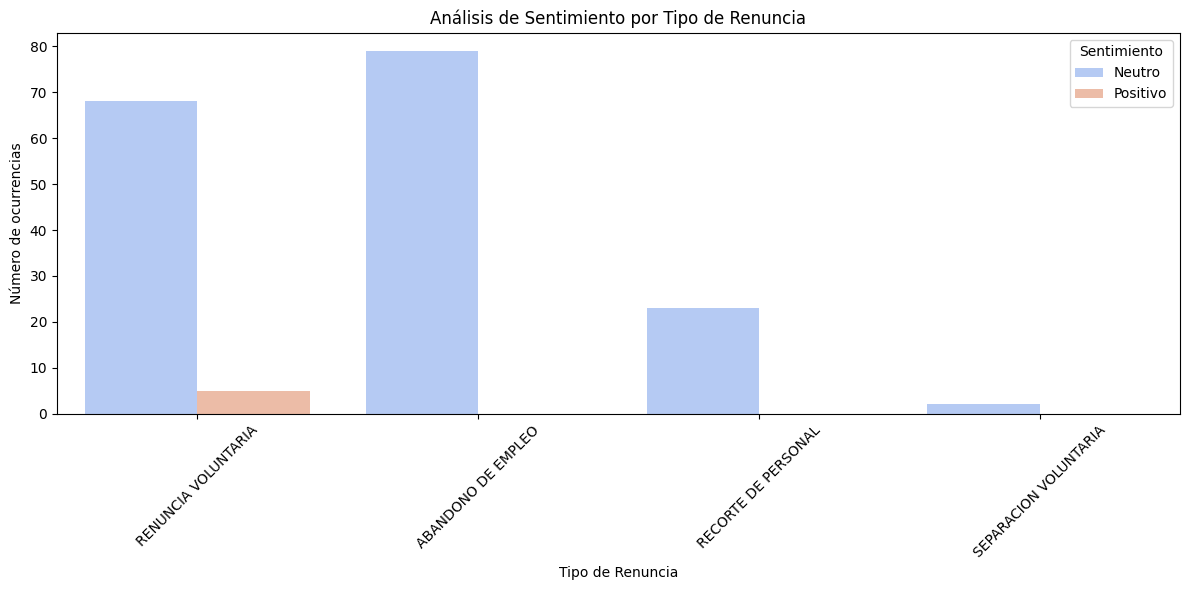

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado, x='Tipo de renuncia', hue='Clasificación Sentimiento', palette='coolwarm')
plt.title('Análisis de Sentimiento por Tipo de Renuncia')
plt.xlabel('Tipo de Renuncia')
plt.ylabel('Número de ocurrencias')
plt.xticks(rotation=45)
plt.legend(title='Sentimiento')
plt.tight_layout()
plt.show()

# Por la poca cantidad de datos puede que nuestro análisis de sentimiento no este clasificando correctamente, ya que al parecer hay una presencia de un sesgo que está provocando que se clasifiquen como neutros la mayoria de los motivos de renucnias.

Intento de crear un resumen por medio de un modelo para observar el panorama general del porque se estan dando los motivos de renuncias.

In [19]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer 

In [20]:
from transformers import pipeline

In [21]:
import tensorflow as tf
print(tf.__version__) 

2.18.0


In [23]:
resumen_modelo = pipeline("summarization", model="t5-small", tokenizer="t5-small")

c:\Users\habar\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\habar\.cache\huggingface\hub\models--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [27]:
def generar_resumen_abstr(textos, max_length=500):
    """
    Genera un resumen abstractivo utilizando un modelo preentrenado.
    """
    textos_limpios = [str(texto) for texto in textos if isinstance(texto, str)]
    texto_completo = ' '.join(textos_limpios)
    resumen = resumen_modelo(texto_completo, max_length=max_length, min_length=20, do_sample=False)
    return resumen[0]['summary_text']


In [28]:
resumen_abstr = generar_resumen_abstr(df_filtrado['Motivo de renuncia'])  # Asegúrate de que df_filtrado esté definido
print("Resumen de motivos de renuncia (abstractivo):")
print(resumen_abstr)

Resumen de motivos de renuncia (abstractivo):
SE LE COMPLIC EL HORARIO DEL TRANSPORTE PARA LLEVAR A SU HIJA A LA ESCUELA SOLO ACUDI A INDUCCION, YA NO SE PRESENT Y NO RESPONDI MENSJAES NI LLAMDAS ESTUVIMOS TRATANDO DE LOCALIZARLO PERO NO FUE POSIBLE CONTACTARLO, PREFIRI QUEDARSE EN


In [31]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def generar_resumen(texto):
    if isinstance(texto, str):
        texto_completo = texto
        resumen = summarizer(texto_completo, max_length=150, min_length=50, do_sample=False)
        return resumen[0]['summary_text']
    else:
        return "Texto no válido o vacío"
df_filtrado['Resumen'] = df_filtrado['Motivo de renuncia'].apply(generar_resumen)

Your max_length is set to 150, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 150, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 150, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 150, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)
Your

In [45]:
df_filtrado=df_filtrado.dropna(subset=['Motivo de renuncia'])

In [47]:
df_filtrado = df_filtrado[df_filtrado['Motivo de renuncia'] != 0]

In [48]:
df_filtrado[['Motivo de renuncia','Resumen']]

,Motivo de renuncia,Resumen
0,SE LE COMPLICÓ EL HORARIO DEL TRANSPORTE PARA ...,"oficial. El presidente de Estados Unidos, Jav..."
5,"SOLO ACUDIÓ A INDUCCION, YA NO S EPRESENTÓ Y N...","Solo ACUDIÓ A INDUCCION, YA NO S EPRESENTÓ Y N..."
8,YA NO SE PRESENTÓ Y NO RESPONDIÓ MENSJAES NI L...,Ya NO SE PRESENTÓ Y NO RESPONDIÓ MENSJAES NI L...
10,ESTUVIMOS TRATANDO DE LOCALIZARLO PERO NO FUE ...,a. No puede contactarlo. No Puede CONTACTARLO....
12,ENOCNTRO MEJOR EMPLEO,NTRO MEJOR EMPLEO. ENOCNTRo Mejor. MEJor. Enoc...
...,...,...
399,PROBLEMAS FAMILIARES,CNN.com will feature iReporter photos in a wee...
403,TEMAS PERSONALES,CNN.com will feature iReporter photos in a wee...
404,PROBLEMAS FAMILIARES,CNN.com will feature iReporter photos in a wee...
421,"SU MAMÁ FALLECIO, SE LE OTORGÓ EL PERMISO QUE ...",". ""I don't think I'm going to be able to do mu..."
